In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from itertools import combinations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
data = pd.read_csv('gini_income_crime_avs1.csv') 

crime = data['share_hate_crimes_per_pop']
loggini = np.log(data['mean_gini'])
logmedian = np.log(data['mean_medians'])
logvotes = np.log(data['share_voters_voted_trump'])

scaled_crime = (crime-min(crime))/(max(crime)-min(crime))	
scaled_gini = (loggini-np.mean(loggini))/np.sqrt(np.var(loggini))
scaled_median = (logmedian-np.mean(logmedian))/(max(logmedian)-min(logmedian))
scaled_votes= (logvotes-np.mean(logvotes))/np.sqrt(np.var(logvotes))

data_fin = pd.DataFrame([])
data_fin['crime']= scaled_crime
data_fin['gini']= scaled_gini
data_fin['median'] = scaled_median
data_fin['votes'] = scaled_votes
#data_fin = pd.concat([data_fin, data['cylinders'], data['model year'], data['origin']], axis=1)
y = data_fin[['crime']]
X = data_fin.drop(['crime'], axis=1)

In [5]:
data_fin

,crime,gini,median,votes
0,0.022487,0.674031,-0.319199,0.751555
1,0.040127,-2.255593,0.369809,0.323051
2,0.176928,0.159920,-0.185648,0.178594
3,0.007386,0.375505,-0.435490,0.630596
4,0.117856,1.103440,0.126598,-0.851532
5,0.099916,-0.127283,0.212550,-0.138325
6,0.165155,1.455483,0.464326,-0.313396
7,0.079419,-0.675413,0.108555,-0.253655
8,1.000000,3.138904,0.472585,-6.083072
9,0.026012,1.025565,-0.253047,0.128508


In [6]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=2, shuffle=True, random_state=1)

baseline = np.mean(cross_val_score(regression, X, y, scoring='r2', cv=crossvalidation))
baseline

0.2114524237235651

In [14]:
crime_1 = data_fin[data_fin['crime'] >= 0.05 ]
crime_2 = data_fin[data_fin['crime'] < 0.05]
crime_2 

,crime,gini,median,votes
0,0.022487,0.674031,-0.319199,0.751555
1,0.040127,-2.255593,0.369809,0.323051
3,0.007386,0.375505,-0.435490,0.630596
9,0.026012,1.025565,-0.253047,0.128508
10,0.011258,0.855120,-0.180579,0.227687
11,0.025899,-1.312790,0.338089,-1.087821
13,0.030133,0.715021,0.122803,-0.437380
15,0.003253,-1.119847,0.028361,0.275828
18,0.028116,1.193798,-0.300539,0.546549
20,0.021407,-0.552867,0.494307,-0.705658


In [15]:
regression_1 = LinearRegression()
regression_2 = LinearRegression()
regression_3 = LinearRegression()

votes_1 = crime_1['votes'].values.reshape(-1, 1)
votes_2 = crime_2['votes'].values.reshape(-1, 1)

regression_1.fit(votes_1, crime_1['gini'])
regression_2.fit(votes_2, crime_2['gini'])

# Make predictions using the testing set
pred_1 = regression_1.predict(votes_1)
pred_2 = regression_2.predict(votes_2)

# The coefficients
print(regression_1.coef_)
print(regression_2.coef_)

#estimates for slope where crime >= 0.05, crime < 0.05

# horses = votes, origin = crime, mpg = median

[-0.51263841]
[0.18767237]


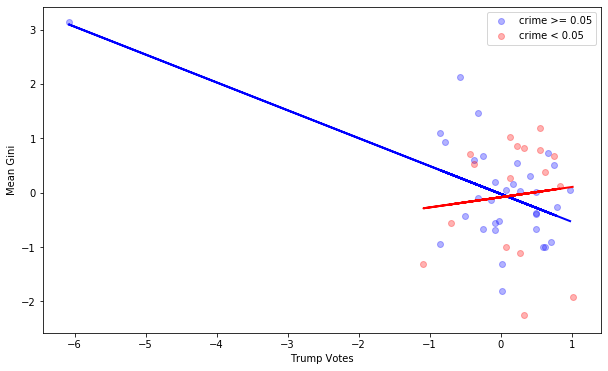

In [16]:
# Plot outputs
plt.figure(figsize=(10,6))

plt.scatter(votes_1, crime_1['gini'],  color='blue', alpha=0.3, label = 'crime >= 0.05')
plt.scatter(votes_2, crime_2['gini'],  color='red', alpha=0.3, label = 'crime < 0.05')

plt.plot(votes_1, pred_1, color='blue', linewidth=2)
plt.plot(votes_2, pred_2, color='red', linewidth=2)
plt.ylabel('Mean Gini')
plt.xlabel('Trump Votes')
plt.legend();

In [20]:
regression = LinearRegression()
crossvalidation = KFold(n_splits=3, shuffle=True, random_state=1)

X_interact = X.copy()
X_interact['votes_gini'] = X['votes'] * X['gini']

interact_votes_gini = np.mean(cross_val_score(regression, X_interact, y, scoring='r2', cv=crossvalidation))
interact_votes_gini

#there is an interaction between these variables, r2 improves from 0.2114524237235651 to 0.22210045606930495

-0.7441326352870261

In [18]:
#is the interaction effect significant? yes!
import statsmodels.api as sm
X_interact = sm.add_constant(X_interact)
model = sm.OLS(y,X_interact)
results = model.fit()

results.summary()

/Users/brittanyfowle/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  crime   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     32.90
Date:                Fri, 17 Jan 2020   Prob (F-statistic):           5.79e-13
Time:                        10:28:20   Log-Likelihood:                 59.833
No. Observations:                  51   AIC:                            -109.7
Df Residuals:                      46   BIC:                            -100.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1028      0.012      8.902      0.000       0.080       0.126
gini           0.0156      0.014      1.154      0.255      -0.012       0.043
median         0.0299      0.056      0.530      0.599      -0.084       0.143
votes         -0.0318      0.025     -1.274      0.209      -0.082       0.018
votes_gini    -0.0329      0.008     -4.252      0.000      -0.048      -0.017
==============================================================================
Omnibus:                        5.496   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.024
Skew:                           0.769   Prob(JB):                       0.0811
Kurtosis:                       3.036   Cond. No.                         15.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
additive_model = ols(formula="cnt~temp + workingday", data = data2).fit()
additive_model.summary()

# Linear Regression

In [19]:
#other OLS regression with intercept
import statsmodels.api as sm
from statsmodels.formula.api import ols
lr_model = ols(formula='gini~votes', data=data_fin).fit() #median income regressed on votes
lr_model.summary()

#linear regression formula is y = 2.25e-15 -0.071 # but this  

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   gini   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     11.68
Date:                Fri, 17 Jan 2020   Prob (F-statistic):            0.00128
Time:                        10:28:32   Log-Likelihood:                -66.915
No. Observations:                  51   AIC:                             137.8
Df Residuals:                      49   BIC:                             141.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -2.776e-16      0.128  -2.16e-15      1.000      -0.258       0.258
votes         -0.4387      0.128     -3.417      0.001      -0.697      -0.181
==============================================================================
Omnibus:                        1.615   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.446   Jarque-Bera (JB):                1.585
Skew:                          -0.356   Prob(JB):                        0.453
Kurtosis:                       2.512   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
lr_model = ols(formula='median~votes', data=data_fin).fit() #median income regressed on votes
lr_model.summary()